# Titanic Data Analysis

Pair programming by [Raphael](https://github.com/FritzRa) and 
[Gerrit](https://github.com/GeFritz).

### Getting the Data


In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('default') 
  
# %matplotlib inline: only draw static images in the notebook 
%matplotlib inline 

path = pathlib.Path("exercises_08.ipynb").resolve().parent.parent.parent / "data" / "titanic.csv"
all_data = pd.read_csv(path)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Above you can see the 891 entries with 12 coloumns. From the table above you can also see that there are 3 coloumns with less than 891 entries meaning the are entries missing. Age with 714 entries, Cabin with 204 entries and embarked with 889 entries.

In [2]:
all_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In the table above one can see various different calculations when looking at each seperate coloumn such as: top, freq, mean std, min, and so on.

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival - Survival (0 = No; 1 = Yes)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare (British pound)

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Above you can see what exactly the different coloumn attributes mean. From [here](https://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf).

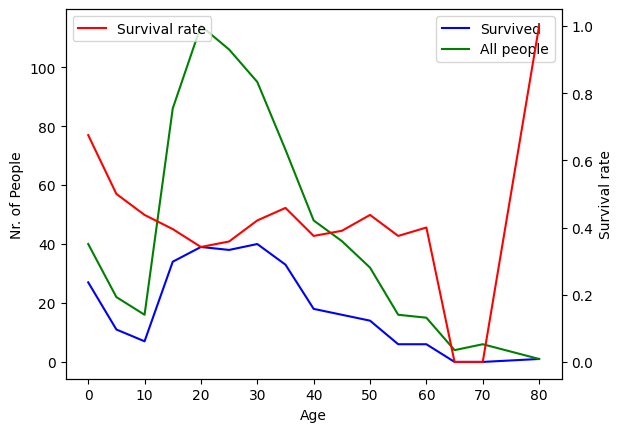

In [3]:
all_data["new_Age"] = all_data["Age"].apply(func=lambda series: (series//5)*5)
age_groups = all_data.groupby("new_Age")

age_sum = age_groups.sum("Survived")
age_mean = age_groups.mean("Survived")
age_total = age_groups.count()

fig, ax = plt.subplots()
twin1 = ax.twinx()

p1, = ax.plot(age_sum["Survived"], "b-", label="Survived")
p2, = twin1.plot(age_mean["Survived"], "r-", label="Survival rate")
p3, = ax.plot(age_total["Survived"], "g-", label="All people")

ax.set_xlabel("Age")
ax.set_ylabel("Nr. of People")
twin1.set_ylabel("Survival rate")

ax.legend()
twin1.legend()

From the graph above one can deduce that the majority of people were between 20 and 40 years old. In these two age groups the survival rate was one of the lowest. This means that age definitely play a role in the suvivor rate of the passengers. Another thing is that passengers aged between 0 and 10 had the highest survival rate even though being below 40 in total. One reason for this could be that younger passengers where given passage to the lifeboats earlier on than older passengers.

<AxesSubplot: xlabel='Sex'>

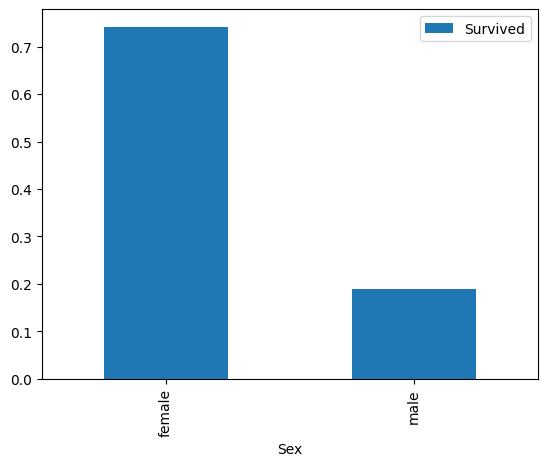

In [4]:
all_data.groupby("Sex").mean("Survived").plot.bar(y="Survived")

The Plot above shows that the female survival rate at around 70% was higher than the male survivorship rate at around 20%. This is a strong deviation meaning that gender played a dominant role in surviving or not surviving the catastrophe.  

<AxesSubplot: xlabel='Pclass'>

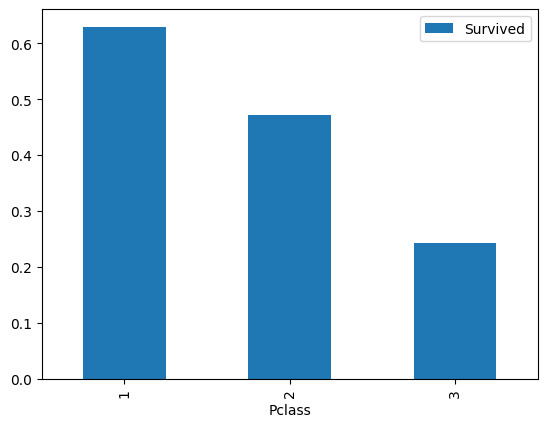

In [5]:
all_data.groupby("Pclass").mean("Survived").plot.bar(y="Survived")

The survivorship rate of the different passenger classes shows that passengers of higher classes (1 or 2) had a better chance to survive than the third passenger class. One reason for the first class having such a high survivorship could be that the higher class rooms might have been located higher up on the ship, meaning easier escape was possible. The class is also tightly conneted with the fare.

<AxesSubplot: xlabel='SibSp'>

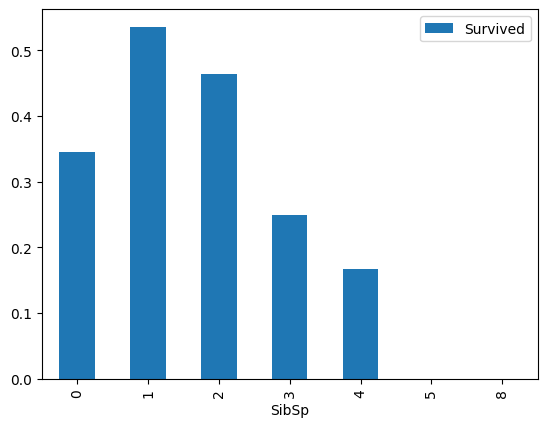

In [6]:
all_data.groupby("SibSp").mean("Survived").plot.bar(y="Survived")

Sibling spouse relation shows a tendency however there is no real reason for the decreased survivorhip rate when looking at 3 or more siblings(spouses) 

<AxesSubplot: xlabel='Parch'>

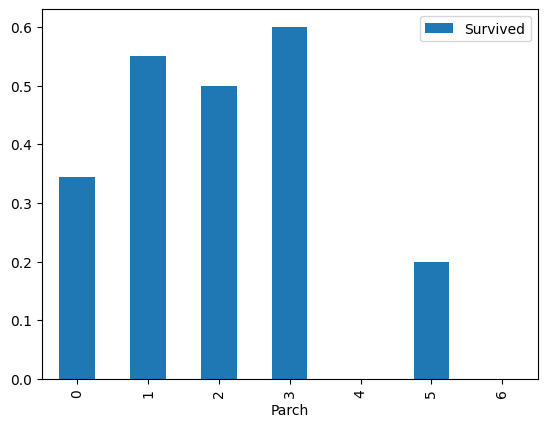

In [7]:
all_data.groupby("Parch").mean("Survived").plot.bar(y="Survived")

The parent child relation shows a tendency however there is no real reason for the increased survivorhip rate when looking at 1 or 2 children 

<AxesSubplot: xlabel='Embarked'>

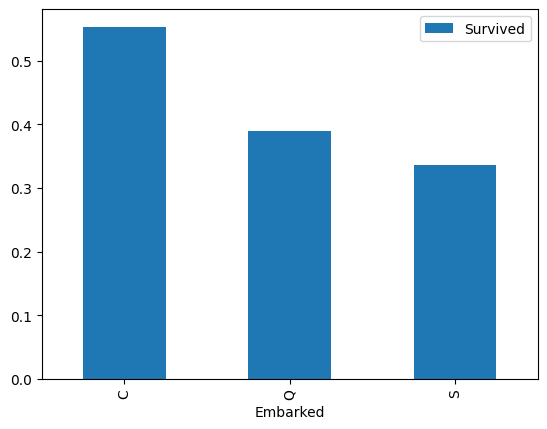

In [8]:
all_data.groupby("Embarked").mean("Survived").plot.bar(y="Survived")

Also interesting is the relation of Embarked towns and the survivorshiprate. However no real reason can be deduced to explain this deviation.
